In [65]:
import numpy as np
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go
import plotly.express as px
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
init_notebook_mode(connected = True)

In [66]:
df = pd.read_csv('../Data/play_store_data.csv')
df.head()

androidVersion  containsAds contentRating contentRatingDescription  \
0             4.0          1.0  Rated for 3+                      NaN   
1             4.0          1.0  Rated for 3+                      NaN   
2            -1.0          0.0  Rated for 3+                      NaN   
3             4.0          1.0  Rated for 3+                      NaN   
4             5.0          0.0  Rated for 3+                      NaN   

  currency                                        description  \
0      USD  automateit is designed to make your life easie...   
1      USD  learn the bible better and have fun with the f...   
2      USD  pediatric oncalls medical calculatorseasy to u...   
3      USD  a r c a d e contiene muchos juegos en línea ar...   
4      XXX  aathiraa app contains of all online recharge s...   

          developer                                   developerAddress  \
0   SmarterApps Ltd                                Petah-Tikva, Israel   
1   Salem New Media  111 Virginia Street\nSuite 500\nRichmond, VA 2...   
2  Pediatric Oncall  1/B, Saguna Building,\nSt Francis Road,\nVile ...   
3   HiFriends, Inc.                                                NaN   
4     venkatperumal                                                NaN   

   editorsChoice  free  ... price  ratings  \
0            0.0   1.0  ...   0.0  15427.0   
1            0.0   1.0  ...   0.0   6462.0   
2            0.0   1.0  ...   0.0   1510.0   
3            0.0   1.0  ...   0.0     13.0   
4            0.0   1.0  ...   0.0      NaN   

                                       recentChanges      released  reviews  \
0                                          bug fixes   Feb 4, 2011   6282.0   
1                                         bug fixing  May 26, 2011   2844.0   
2           new calculators addedvarious bugs fixed.  May 11, 2012    313.0   
3  chat dentro y fuera de los juegos.disponibilid...  Feb 23, 2020      8.0   
4  aathiraa app contains of all online recharge s...  Mar 20, 2021      0.0   

      score                size  \
0  3.619326                 19M   
1  4.380805                9.5M   
2  4.443708  Varies with device   
3  4.461538                7.9M   
4  0.000000                 20M   

                                             summary  \
0  Automatically launch tasks by location, SMS, b...   
1  Bible Trivia is so much fun, how good are you?...   
2  Over 50 free calculators that you can use offl...   
3  Welcome to A R C A D E, a collection of games ...   
4                Aathiraa Communication Payment Util   

                                               title       updated  
0  AutomateIt - Automate tasks, save battery and ...  1.620922e+09  
1                             Bible Trivia Game Free  1.589908e+09  
2                                Medical Calculators  1.594438e+09  
3                                        ARCADE Game  1.585437e+09  
4                             Aathiraa Communication  1.616232e+09  

[5 rows x 27 columns]

In [67]:
df.drop(['updated'], axis = 1, inplace = True)

In [68]:
df.describe()

androidVersion   containsAds  editorsChoice          free  \
count    11769.000000  11798.000000   11798.000000  11794.000000   
mean         4.111989      0.642567       0.015342      0.984992   
std          1.517975      0.479264       0.122913      0.121588   
min         -1.000000      0.000000       0.000000      0.000000   
25%          4.000000      0.000000       0.000000      1.000000   
50%          4.000000      1.000000       0.000000      1.000000   
75%          5.000000      1.000000       0.000000      1.000000   
max          8.000000      1.000000       1.000000      1.000000   

        minInstalls     offersIAP  originalPrice         price       ratings  \
count  1.179800e+04  11798.000000       8.000000  11794.000000  1.064400e+04   
mean   8.064373e+06      0.408205     133.750000      5.812558  1.604587e+05   
std    1.141509e+08      0.491522     134.688795    153.094892  2.189557e+06   
min    0.000000e+00      0.000000      10.000000      0.000000  5.000000e+00   
25%    5.000000e+03      0.000000      25.000000      0.000000  1.000000e+02   
50%    1.000000e+05      0.000000      75.000000      0.000000  1.164000e+03   
75%    1.000000e+06      1.000000     252.500000      0.000000  1.453900e+04   
max    5.000000e+09      1.000000     320.000000  15000.000000  1.362125e+08   

            reviews         score  
count  1.172100e+04  11721.000000  
mean   5.122102e+04      3.734172  
std    7.845089e+05      1.288564  
min    0.000000e+00      0.000000  
25%    2.200000e+01      3.713889  
50%    2.970000e+02      4.146437  
75%    4.144000e+03      4.433333  
max    5.068170e+07      5.000000

In [69]:
df.shape

(11802, 26)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11802 entries, 0 to 11801
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   androidVersion            11769 non-null  float64
 1   containsAds               11798 non-null  float64
 2   contentRating             11798 non-null  object 
 3   contentRatingDescription  2029 non-null   object 
 4   currency                  11796 non-null  object 
 5   description               11800 non-null  object 
 6   developer                 11800 non-null  object 
 7   developerAddress          7557 non-null   object 
 8   editorsChoice             11798 non-null  float64
 9   free                      11794 non-null  float64
 10  genre                     11798 non-null  object 
 11  histogram                 11798 non-null  object 
 12  inAppProductPrice         4816 non-null   object 
 13  installs                  11794 non-null  object 
 14  minIns

In [71]:
df.columns

Index(['androidVersion', 'containsAds', 'contentRating',
       'contentRatingDescription', 'currency', 'description', 'developer',
       'developerAddress', 'editorsChoice', 'free', 'genre', 'histogram',
       'inAppProductPrice', 'installs', 'minInstalls', 'offersIAP',
       'originalPrice', 'price', 'ratings', 'recentChanges', 'released',
       'reviews', 'score', 'size', 'summary', 'title'],
      dtype='object')

In [72]:
def get_hist(col):
    trace = go.Histogram(x = col, nbinsx = 80, histnorm='percent')
    data = [trace]
    
    layout = go.Layout(title = col.name)
    
    fig = go.Figure(data = data, layout = layout)
    
    iplot(fig)
    
def get_boxplot(df, col_name):
    fig = px.box(df, y=col_name, points = 'all')
    fig.show()

In [73]:
get_hist(df['androidVersion'])

In [74]:
get_hist(df['containsAds'])

In [75]:
get_hist(df['contentRating'])

In [76]:
get_hist(df['currency'])

In [77]:
get_boxplot(df, "score")

In [78]:
get_hist(df['score'])

By looking at this spread, one thing is for certain that more or less, apps tend to get a rating of 3.7+

I'm gonna do some analysis and try looking into what actually makes an app get a rating of less than 3.7

Another thing to notice is the occurence of these zero values. They could either mean that the app hasn't got any rating yet or the rating could not be extracted via the Google Play Store API. I'll take a look at this as well now.

In [79]:
def create_split(row):
    if row['score']!=0:
        if row['score'] >=3.7:
            return 1
        else:
            return 0
        
df_analysis = df.copy()
df_analysis['analysis_split'] = df_analysis.apply(create_split, axis = 1)
df_analysis.head()

androidVersion  containsAds contentRating contentRatingDescription  \
0             4.0          1.0  Rated for 3+                      NaN   
1             4.0          1.0  Rated for 3+                      NaN   
2            -1.0          0.0  Rated for 3+                      NaN   
3             4.0          1.0  Rated for 3+                      NaN   
4             5.0          0.0  Rated for 3+                      NaN   

  currency                                        description  \
0      USD  automateit is designed to make your life easie...   
1      USD  learn the bible better and have fun with the f...   
2      USD  pediatric oncalls medical calculatorseasy to u...   
3      USD  a r c a d e contiene muchos juegos en línea ar...   
4      XXX  aathiraa app contains of all online recharge s...   

          developer                                   developerAddress  \
0   SmarterApps Ltd                                Petah-Tikva, Israel   
1   Salem New Media  111 Virginia Street\nSuite 500\nRichmond, VA 2...   
2  Pediatric Oncall  1/B, Saguna Building,\nSt Francis Road,\nVile ...   
3   HiFriends, Inc.                                                NaN   
4     venkatperumal                                                NaN   

   editorsChoice  free  ... price  ratings  \
0            0.0   1.0  ...   0.0  15427.0   
1            0.0   1.0  ...   0.0   6462.0   
2            0.0   1.0  ...   0.0   1510.0   
3            0.0   1.0  ...   0.0     13.0   
4            0.0   1.0  ...   0.0      NaN   

                                       recentChanges      released  reviews  \
0                                          bug fixes   Feb 4, 2011   6282.0   
1                                         bug fixing  May 26, 2011   2844.0   
2           new calculators addedvarious bugs fixed.  May 11, 2012    313.0   
3  chat dentro y fuera de los juegos.disponibilid...  Feb 23, 2020      8.0   
4  aathiraa app contains of all online recharge s...  Mar 20, 2021      0.0   

      score                size  \
0  3.619326                 19M   
1  4.380805                9.5M   
2  4.443708  Varies with device   
3  4.461538                7.9M   
4  0.000000                 20M   

                                             summary  \
0  Automatically launch tasks by location, SMS, b...   
1  Bible Trivia is so much fun, how good are you?...   
2  Over 50 free calculators that you can use offl...   
3  Welcome to A R C A D E, a collection of games ...   
4                Aathiraa Communication Payment Util   

                                               title analysis_split  
0  AutomateIt - Automate tasks, save battery and ...            0.0  
1                             Bible Trivia Game Free            1.0  
2                                Medical Calculators            1.0  
3                                        ARCADE Game            1.0  
4                             Aathiraa Communication            NaN  

[5 rows x 27 columns]

In [80]:
df_analysis = df_analysis[df_analysis['analysis_split'].notna()]
df_analysis.head()

androidVersion  containsAds contentRating contentRatingDescription  \
0             4.0          1.0  Rated for 3+                      NaN   
1             4.0          1.0  Rated for 3+                      NaN   
2            -1.0          0.0  Rated for 3+                      NaN   
3             4.0          1.0  Rated for 3+                      NaN   
5             5.0          1.0  Rated for 3+                      NaN   

  currency                                        description  \
0      USD  automateit is designed to make your life easie...   
1      USD  learn the bible better and have fun with the f...   
2      USD  pediatric oncalls medical calculatorseasy to u...   
3      USD  a r c a d e contiene muchos juegos en línea ar...   
5      USD  b kids preschool learning app with songs offli...   

                                        developer  \
0                                 SmarterApps Ltd   
1                                 Salem New Media   
2                                Pediatric Oncall   
3                                 HiFriends, Inc.   
5  Kidzooly - Kids Games, Rhymes , Nursery Songs.   

                                    developerAddress  editorsChoice  free  \
0                                Petah-Tikva, Israel            0.0   1.0   
1  111 Virginia Street\nSuite 500\nRichmond, VA 2...            0.0   1.0   
2  1/B, Saguna Building,\nSt Francis Road,\nVile ...            0.0   1.0   
3                                                NaN            0.0   1.0   
5  VGMinds TechStudios Pvt Ltd\nThe Pavillion\n1s...            0.0   1.0   

   ... price  ratings                                      recentChanges  \
0  ...   0.0  15427.0                                          bug fixes   
1  ...   0.0   6462.0                                         bug fixing   
2  ...   0.0   1510.0           new calculators addedvarious bugs fixed.   
3  ...   0.0     13.0  chat dentro y fuera de los juegos.disponibilid...   
5  ...   0.0   2551.0  all preschool kids learning songs videos and r...   

       released  reviews     score                size  \
0   Feb 4, 2011   6282.0  3.619326                 19M   
1  May 26, 2011   2844.0  4.380805                9.5M   
2  May 11, 2012    313.0  4.443708  Varies with device   
3  Feb 23, 2020      8.0  4.461538                7.9M   
5  Feb 26, 2017    885.0  4.152941                 39M   

                                             summary  \
0  Automatically launch tasks by location, SMS, b...   
1  Bible Trivia is so much fun, how good are you?...   
2  Over 50 free calculators that you can use offl...   
3  Welcome to A R C A D E, a collection of games ...   
5  Kids Preschool  Learning app for ABC, Numbers,...   

                                               title analysis_split  
0  AutomateIt - Automate tasks, save battery and ...            0.0  
1                             Bible Trivia Game Free            1.0  
2                                Medical Calculators            1.0  
3                                        ARCADE Game            1.0  
5     Kids Preschool Learning Songs & Offline Videos            1.0  

[5 rows x 27 columns]

In [81]:
fig = px.box(df_analysis, x='genre', y='score', color='analysis_split')
fig.show()

#### Insight 1 for report
From here one can see that there are a few genre for which there are apps which have a severely low rating. They are: "Business", "Comics", "Parenting", "Entertainment", "Puzzle", "House & Home", "Weather". in such a situation we can reasonably ignore outliers because the number of outliers here is massively smaller than the total number of data points

In [82]:
stopwords = set(STOPWORDS)
stopwords.add("will")
stopwords.add("now")
stopwords.add("app")
stopwords.add("use")
wordcloud = WordCloud(width = 512, height=512, background_color = "white",
                     max_font_size = 90,max_words = 200, stopwords=stopwords, colormap='Dark2',
                     mask=None).generate(" ".join([i for i in df_analysis[df_analysis['analysis_split'] == 0]['description'].dropna()]))
plt.figure(figsize = (20,20), facecolor = 'white', edgecolor='blue')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Description Wordcloud")
plt.tight_layout(pad=0)
plt.show()

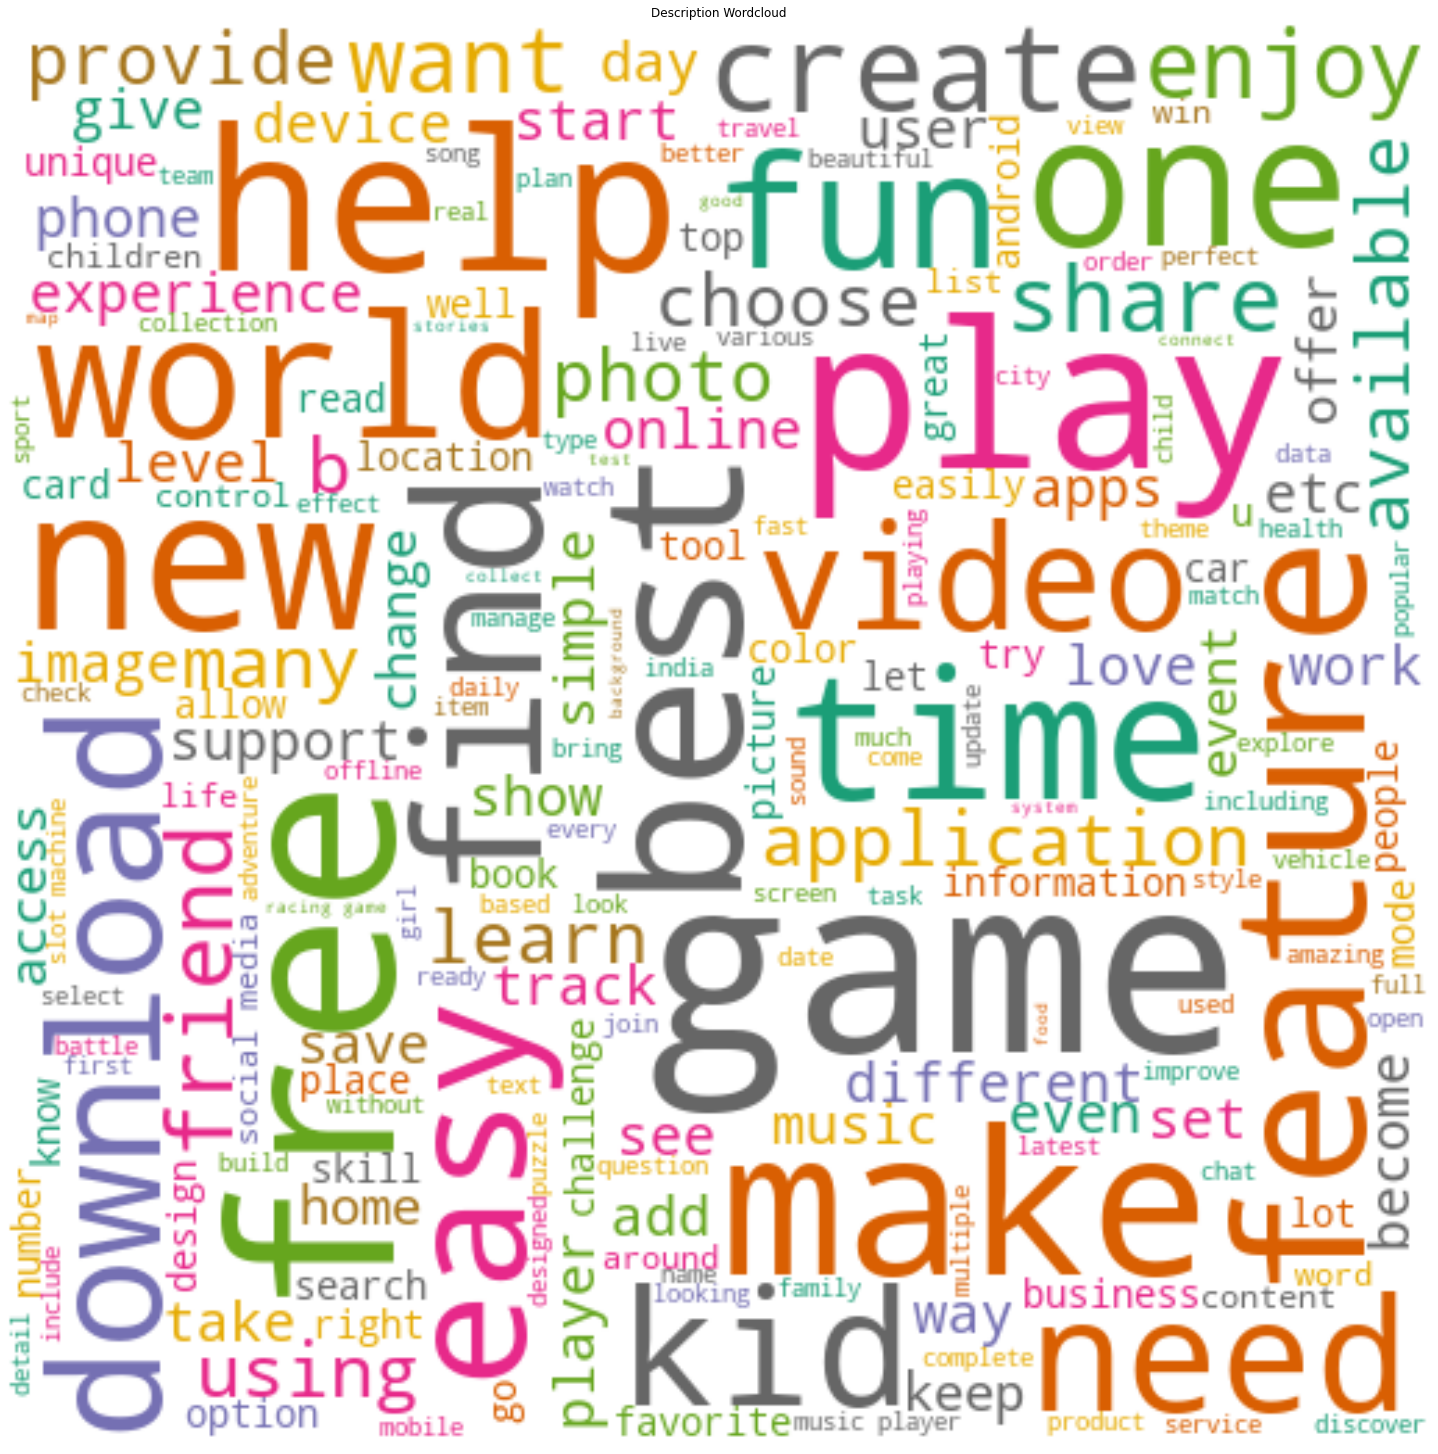

In [83]:
stopwords = set(STOPWORDS)
stopwords.add("will")
stopwords.add("now")
stopwords.add("app")
stopwords.add("use")
wordcloud = WordCloud(width = 512, height=512, background_color = "white",
                     max_font_size = 90,max_words = 200, stopwords=stopwords, colormap='Dark2',
                     mask=None).generate(" ".join([i for i in df_analysis[df_analysis['analysis_split'] == 1]['description'].dropna()]))
plt.figure(figsize = (20,20), facecolor = 'white', edgecolor='blue')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Description Wordcloud")
plt.tight_layout(pad=0)
plt.show()

#### Insight 2 for report
There are some inferences that we can draw from these wordclouds which could help us understand how the developers who have a higher app rating would frame the description of their application

- The word "easy" has a much greater occurence in apps whose descriptions have a higher rating which shows that the end users would prefer using an appplication if it is easy to use
- If an app is meant for children them emphasizing on the fact that it is for kids, also helps in framing a better description as shows by the two above wordclouds
- In general the kind of applications that widely exist are games, so having the word "fun" associated with the game in the description, leads to a larger user base(in usual).

In [84]:
fig = px.box(df_analysis[(df_analysis['price']<4500) & (df_analysis['free']==0)],
             x='genre', y='price', color='analysis_split')
fig.show()

Just a few observations from here:

#### Insight 3 for report

- Apps which have charged a higher price for education have received a higher rating (Maybe because of a thinking that expensive education is better?)
- Apps in the personalization category have received a better rating if they had a lesser price.
- Tools apps have a higher rating if they're more expensive.

In [92]:
review_agg = df_analysis.groupby(['genre', 'analysis_split']).agg({'reviews':'median'}).reset_index()
review_agg.head()

genre  analysis_split  reviews
0     Action             0.0    117.0
1     Action             1.0   2219.5
2  Adventure             0.0     99.0
3  Adventure             1.0    907.0
4     Arcade             0.0    117.0

In [94]:
fig = go.Figure(data=[
    go.Bar(
    name = 'Apps with Rating < 3.7',
    x = review_agg[(review_agg['analysis_split'] == 0)&(review_agg['reviews']<5000)]['genre'],
    y = review_agg[(review_agg['analysis_split'] == 0)&(review_agg['reviews']<5000)]['reviews']
   ),
    go.Bar(
    name = 'Apps with Rating >=3.7',
    x = review_agg[(review_agg['analysis_split'] == 1)&(review_agg['reviews']<5000)]['genre'],
    y = review_agg[(review_agg['analysis_split'] == 1)&(review_agg['reviews']<5000)]['reviews']
   )
])
fig.show()

In general it can be seen that the apps with a lower rating have lesser number of reviews given from which we can reasonably say that the user base of apps with a lesser rating is significantly lesser

Some of the reasons for apps like Social media apps getting a significantly higher number of reviews could be comments which offer criticism towards the app

In [87]:
#Comparing the size of these apps
df_analysis['size'].head()

0                   19M
1                  9.5M
2    Varies with device
3                  7.9M
5                   39M
Name: size, dtype: object

In [88]:
def clean_size(entry):
    if entry == entry:
        if entry == 'Varies with device':
            return -1
        else:
            return float(entry.replace(',', '')[:-1])
        
df_analysis['size'] = df_analysis['size'].apply(clean_size)
df['size'] = df['size'].apply(clean_size)

In [89]:
df_analysis['size'].head()

0    19.0
1     9.5
2    -1.0
3     7.9
5    39.0
Name: size, dtype: float64

In [95]:
size_agg = df_analysis[df_analysis['size']>0].groupby(['genre', 'analysis_split']).agg({'size':'median'}).reset_index()

fig = go.Figure(data=[
    go.Bar(
    name = 'Apps with Rating < 3.7',
    x = size_agg[(size_agg['analysis_split'] == 0)]['genre'],
    y = size_agg[(size_agg['analysis_split'] == 0)]['size']
   ),
    go.Bar(
    name = 'Apps with Rating >=3.7',
    x = size_agg[(size_agg['analysis_split'] == 1)]['genre'],
    y = size_agg[(size_agg['analysis_split'] == 1)]['size']
   )
])
fig.show()

Nothing specific from here

In [91]:
df_analysis['released'].head()

0     Feb 4, 2011
1    May 26, 2011
2    May 11, 2012
3    Feb 23, 2020
5    Feb 26, 2017
Name: released, dtype: object

In [97]:
month_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
              'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

def get_day_month_year(row):
    if row['released'] == row['released']:
        row['Day'] = int(row['released'].split(' ')[1][:-1])
        row['Month'] = month_dict[row['released'].split(' ')[0]]
        row['Year'] = int(row['released'].split(' ')[2])
        
    return row

df_analysis = df_analysis.apply(get_day_month_year, axis = 1)

In [99]:
df_analysis.drop(['released'], axis = 1, inplace = True)
df_analysis.head()

Day  Month    Year  analysis_split  androidVersion  containsAds  \
0   4.0    2.0  2011.0             0.0             4.0          1.0   
1  26.0    5.0  2011.0             1.0             4.0          1.0   
2  11.0    5.0  2012.0             1.0            -1.0          0.0   
3  23.0    2.0  2020.0             1.0             4.0          1.0   
5  26.0    2.0  2017.0             1.0             5.0          1.0   

  contentRating contentRatingDescription currency  \
0  Rated for 3+                      NaN      USD   
1  Rated for 3+                      NaN      USD   
2  Rated for 3+                      NaN      USD   
3  Rated for 3+                      NaN      USD   
5  Rated for 3+                      NaN      USD   

                                         description  ... offersIAP  \
0  automateit is designed to make your life easie...  ...       1.0   
1  learn the bible better and have fun with the f...  ...       1.0   
2  pediatric oncalls medical calculatorseasy to u...  ...       0.0   
3  a r c a d e contiene muchos juegos en línea ar...  ...       0.0   
5  b kids preschool learning app with songs offli...  ...       1.0   

  originalPrice  price  ratings  \
0           NaN    0.0  15427.0   
1           NaN    0.0   6462.0   
2           NaN    0.0   1510.0   
3           NaN    0.0     13.0   
5           NaN    0.0   2551.0   

                                       recentChanges reviews     score  size  \
0                                          bug fixes  6282.0  3.619326  19.0   
1                                         bug fixing  2844.0  4.380805   9.5   
2           new calculators addedvarious bugs fixed.   313.0  4.443708  -1.0   
3  chat dentro y fuera de los juegos.disponibilid...     8.0  4.461538   7.9   
5  all preschool kids learning songs videos and r...   885.0  4.152941  39.0   

                                             summary  \
0  Automatically launch tasks by location, SMS, b...   
1  Bible Trivia is so much fun, how good are you?...   
2  Over 50 free calculators that you can use offl...   
3  Welcome to A R C A D E, a collection of games ...   
5  Kids Preschool  Learning app for ABC, Numbers,...   

                                               title  
0  AutomateIt - Automate tasks, save battery and ...  
1                             Bible Trivia Game Free  
2                                Medical Calculators  
3                                        ARCADE Game  
5     Kids Preschool Learning Songs & Offline Videos  

[5 rows x 29 columns]

In [111]:
df_analysis['Years_from_release'] = df_analysis['Year'].apply(lambda x:2021-x)
df_analysis.head()

Day  Month    Year  analysis_split  androidVersion  containsAds  \
0   4.0    2.0  2011.0             0.0             4.0          1.0   
1  26.0    5.0  2011.0             1.0             4.0          1.0   
2  11.0    5.0  2012.0             1.0            -1.0          0.0   
3  23.0    2.0  2020.0             1.0             4.0          1.0   
5  26.0    2.0  2017.0             1.0             5.0          1.0   

  contentRating contentRatingDescription currency  \
0  Rated for 3+                      NaN      USD   
1  Rated for 3+                      NaN      USD   
2  Rated for 3+                      NaN      USD   
3  Rated for 3+                      NaN      USD   
5  Rated for 3+                      NaN      USD   

                                         description  ... originalPrice price  \
0  automateit is designed to make your life easie...  ...           NaN   0.0   
1  learn the bible better and have fun with the f...  ...           NaN   0.0   
2  pediatric oncalls medical calculatorseasy to u...  ...           NaN   0.0   
3  a r c a d e contiene muchos juegos en línea ar...  ...           NaN   0.0   
5  b kids preschool learning app with songs offli...  ...           NaN   0.0   

   ratings                                      recentChanges reviews  \
0  15427.0                                          bug fixes  6282.0   
1   6462.0                                         bug fixing  2844.0   
2   1510.0           new calculators addedvarious bugs fixed.   313.0   
3     13.0  chat dentro y fuera de los juegos.disponibilid...     8.0   
5   2551.0  all preschool kids learning songs videos and r...   885.0   

      score  size                                            summary  \
0  3.619326  19.0  Automatically launch tasks by location, SMS, b...   
1  4.380805   9.5  Bible Trivia is so much fun, how good are you?...   
2  4.443708  -1.0  Over 50 free calculators that you can use offl...   
3  4.461538   7.9  Welcome to A R C A D E, a collection of games ...   
5  4.152941  39.0  Kids Preschool  Learning app for ABC, Numbers,...   

                                               title  Years_from_release  
0  AutomateIt - Automate tasks, save battery and ...                10.0  
1                             Bible Trivia Game Free                10.0  
2                                Medical Calculators                 9.0  
3                                        ARCADE Game                 1.0  
5     Kids Preschool Learning Songs & Offline Videos                 4.0  

[5 rows x 30 columns]

In [113]:
year_agg = df_analysis.groupby(['genre', 'analysis_split']).agg({'Years_from_release':'median'}).reset_index()

fig = go.Figure(data=[
    go.Bar(
    name = 'Apps with Rating < 3.7',
    x = year_agg[(year_agg['analysis_split'] == 0)]['genre'],
    y = year_agg[(year_agg['analysis_split'] == 0)]['Years_from_release']
   ),
    go.Bar(
    name = 'Apps with Rating >=3.7',
    x = year_agg[(year_agg['analysis_split'] == 1)]['genre'],
    y = year_agg[(year_agg['analysis_split'] == 1)]['Years_from_release']
   )
])
fig.show()

There are some interesting insights which we can gather from here:
#### Insight 4 for report
- For Action based apps, recent releases are given a higher rating compared to those from an older age, showing that apps in this genre can get outdated really quick if you don't bring out new updates
- Same can be said for communication, where apps which were released almost 5 years ago see a not so good rating on the app store. People love new updates in communication!!
- In genres like medical apps, consumers like to go ahead with something that they can trust and has been established. This is shown by older apps getting a higher rating in comparison to the more recent apps.
- With News, the population likes staying up to date and since a majority of the people have shifted to E-News between 3-4 years ago, any apps published during that time have been riding that wave till date

In [116]:
fig = px.histogram(df_analysis, x='contentRating',
             color = 'analysis_split')
fig.show()

Nothing interesting here. All of them have a 1:5 ratio if we look at split0 : split1 ratio

In [117]:
df_analysis['inAppProductPrice'].head()

0            ₹160.00 per item
1            ₹130.00 per item
2                         NaN
3                         NaN
5    ₹25.00 - ₹50.00 per item
Name: inAppProductPrice, dtype: object

In [121]:
def get_product_price(entry):
    if entry == entry:
        entry = float(entry.split('-')[-1].lstrip().split(' ')[0][1:].replace(',', ''))
        return entry
    
df_analysis['product_price'] = df_analysis['inAppProductPrice'].apply(get_product_price)

In [122]:
df_analysis['product_price'].head(10)

0     160.0
1     130.0
2       NaN
3       NaN
5      50.0
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
Name: product_price, dtype: float64

In [124]:
price_agg = df_analysis.groupby(['genre', 'analysis_split']).agg({'product_price':'median'}).reset_index()

fig = go.Figure(data=[
    go.Bar(
    name = 'Apps with Rating < 3.7',
    x = price_agg[(price_agg['analysis_split'] == 0)]['genre'],
    y = price_agg[(price_agg['analysis_split'] == 0)]['product_price']
   ),
    go.Bar(
    name = 'Apps with Rating >=3.7',
    x = price_agg[(price_agg['analysis_split'] == 1)]['genre'],
    y = price_agg[(price_agg['analysis_split'] == 1)]['product_price']
   )
])
fig.show()

#### Insight 5 for report
There are some genres where having high in-app product price is linked to an increase in rating for the app whereas some genres which have the exact opposite effect of having a high price. 
- Categories like Business, Dating, Finance, Health and Fitness, News and Magazines and Travel are ones were you should keep a significantly lower price when compared to it's median value shown
- If you want to monetize the app and still maintain a high rating for it, categories like Action, Adventure, Card, Communication, House and Home, Shopping, Simulation, Social, Strategy and Trivia can offer you good returns.